<a href="https://colab.research.google.com/github/aashiv10/-segmentation-ml/blob/main/mallsegm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [ ]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")  # Ensure the file is in your working directory
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Rename columns for clarity
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Encode categorical data (Gender: Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize numeric features (Annual Income & Spending Score)
scaler = StandardScaler()
df[['Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])

# Display the first 5 rows
print(df.head())

   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1       0   19      -1.738999       -0.434801
1           2       0   21      -1.738999        1.195704
2           3       1   20      -1.700830       -1.715913
3           4       1   23      -1.700830        1.040418
4           5       1   31      -1.662660       -0.395980


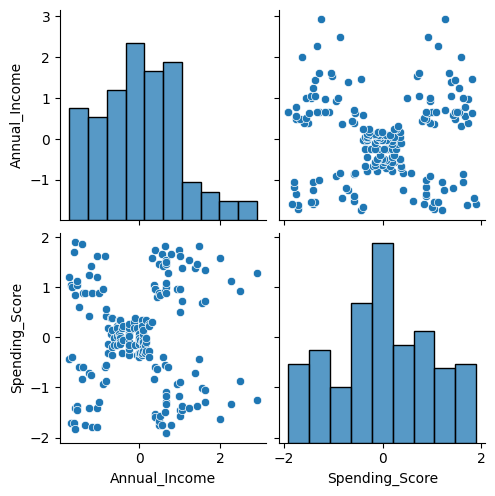

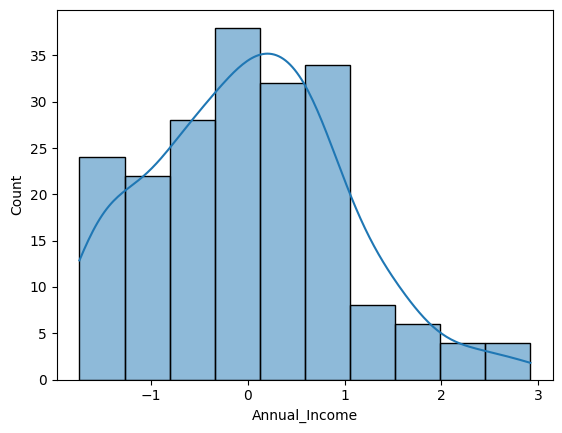

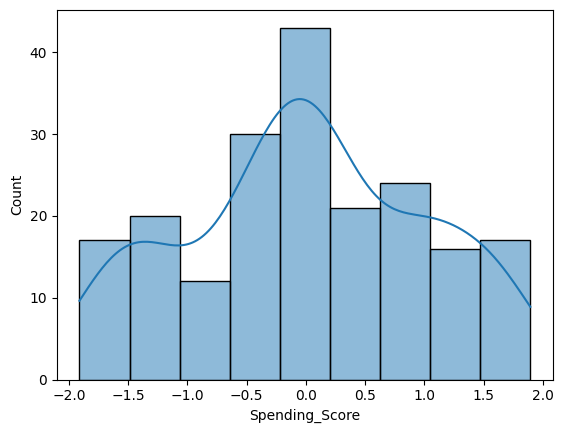

In [ ]:
# Pairplot to see relationships
sns.pairplot(df[['Annual_Income', 'Spending_Score']])
plt.show()

# Distribution of Annual Income
sns.histplot(df['Annual_Income'], kde=True)
plt.show()

# Distribution of Spending Score
sns.histplot(df['Spending_Score'], kde=True)
plt.show()


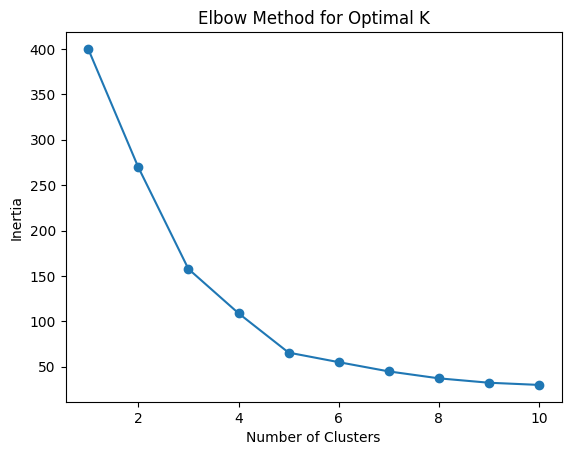

In [ ]:
from sklearn.cluster import KMeans

# Find optimal number of clusters using the elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Annual_Income', 'Spending_Score']])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


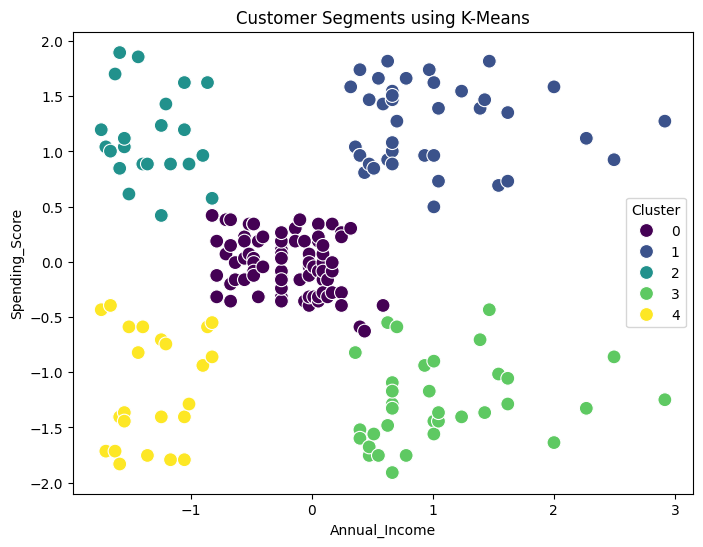

In [ ]:
# Apply K-Means with optimal K (let's assume K=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Annual_Income', 'Spending_Score']])

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments using K-Means')
plt.show()


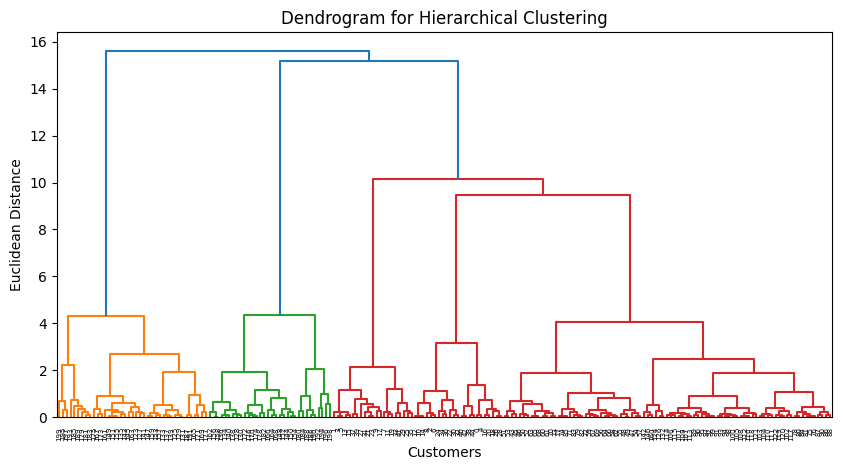

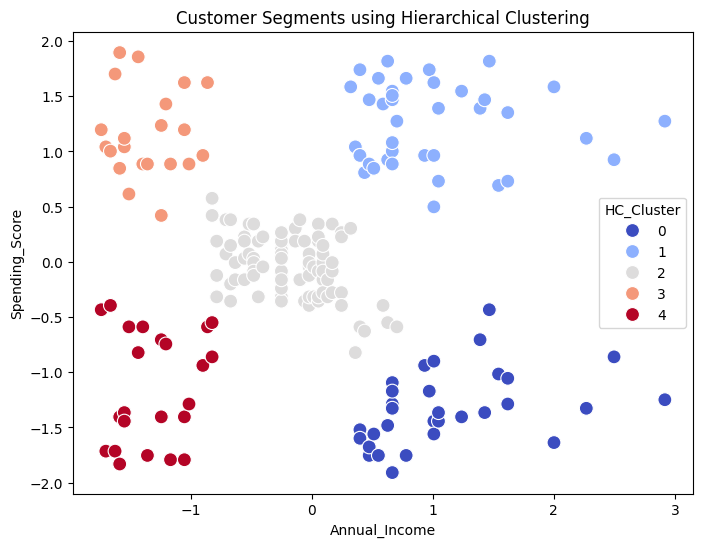

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df[['Annual_Income', 'Spending_Score']], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, linkage='ward') # Remove affinity argument
df['HC_Cluster'] = hc.fit_predict(df[['Annual_Income', 'Spending_Score']])

# Visualizing hierarchical clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='HC_Cluster', palette='coolwarm', s=100)
plt.title('Customer Segments using Hierarchical Clustering')
plt.show()


In [ ]:
# Grouped summary
summary = df.groupby('Cluster')[['Annual_Income', 'Spending_Score']].mean()
print(summary)


         Annual_Income  Spending_Score
Cluster                               
0            -0.200913       -0.026456
1             0.991583        1.239503
2            -1.329545        1.132178
3             1.055003       -1.284439
4            -1.307519       -1.136965
